## Iris Example PyTorch Implementation
https://bennydai.files.wordpress.com/2018/02/iris-example-pytorch-implementation.pdf

### 1 Iris Example using Pytorch.nn
Using SciKit’s Learn’s prebuilt datset of Iris Flowers (which is in a numpy data format), we build
a linear classifier in PyTorch.nn to predict what species of flower it is. We start with loading the
dataset and viewing the dataset’s properties.

In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
features, pre_labels = iris_data.data, iris_data.target
print (features[::10]) #print every 10th element
print (pre_labels[::10]) #print every 10th element

[[5.1 3.5 1.4 0.2]
 [5.4 3.7 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [4.8 3.1 1.6 0.2]
 [5.  3.5 1.3 0.3]
 [7.  3.2 4.7 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.2 4.8 1.8]
 [5.5 2.4 3.8 1.1]
 [5.5 2.6 4.4 1.2]
 [6.3 3.3 6.  2.5]
 [6.5 3.2 5.1 2. ]
 [6.9 3.2 5.7 2.3]
 [7.4 2.8 6.1 1.9]
 [6.7 3.1 5.6 2.4]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


As you can see above, the dataset is organised by the labels. So we need to shuffle the dataset
so our model is able learn or have the data fitted appropriately. Before we shuffle the data, we
need to do some data pre-processing
### 1.0.1 Preprocessing labels to an array
We convert the class indexes into an array. So as for example, for `class[0]` it would look like `[1, 0,
0]`. We also convert it to a numpy array for better computation and memory. We need to apply 'one-hot-encoding' for the labels so our linear model is able to give is a probability of what flower
it is

In [2]:
labels = []
for num in range(len(pre_labels)):
    if pre_labels[num] == 0:
        labels.append([1, 0, 0])
    if pre_labels[num] == 1:
        labels.append([0, 1, 0])
    if pre_labels[num] == 2:
        labels.append([0, 0, 1])
        
import numpy as np
labels = np.array(labels, dtype = int)

### 1.0.2 Shuffling and splitting dataset into training and testing
We import the prebuit function in sci-kit learn to split the dataset into training and testing. We
also shuffle the data to ensure that our training set is top-notch in quality. We print the length of
each split of the dataset to confirm that the split is appropriate.

In [3]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, labels_train, labels_test = train_test_split(features, labels, random_state = 42)
print(len(feature_train))
print(len(feature_test))

112
38


### 1.0.3 Importing the necessary libraries and functions
We import the PyTorch framework and all the necessary functions that comes along with it. We
also assign our data to the PyTorch placeholder variables. We print the features and label ’tensors’
to see how it looks.

In [4]:
 import torch
import torch.nn as nn #PyTorch's module wrapper
import torch.optim as optim #PyTorch's optimiser
from torch.autograd import Variable #PyTorch's implementer of gradient descent and back propogation
import numpy as np

import matplotlib.pyplot as plt #importing graph plotting functionality
%matplotlib inline

feature_train_v = Variable(torch.FloatTensor(feature_train), requires_grad = False)
labels_train_v = Variable(torch.FloatTensor(labels_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(feature_test), requires_grad = False)
labels_test_v = Variable(torch.FloatTensor(labels_test), requires_grad = False)

print (feature_train_v[0])
print (labels_train_v[0])

tensor([5.0000, 3.6000, 1.4000, 0.2000])
tensor([1., 0., 0.])


As you can see from the above, for the 0th element of the tensor array; it is most likely of class
0.
### 1.0.4 Defining the architecture, functions and parameters of our neural network
The model consists of a linear layer and a softmax layer. We also define the loss function and the
optimiser. The model will return three values of the likelihood of what kind of flower it is. The
softmax feature will essentially convert the outputs of the linear layer to probability values in a
nutshell. We use a binary cross entropy loss function to ensure that the model is learning in the
’correct manner’ (I still don’t understand why we use a binary cross entropy loss function)

In [5]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.h_layer = nn.Linear(4, 3)
        self.s_layer = nn.Softmax()
    def forward(self, x):
        y = self.h_layer(x)
        p = self.s_layer(y)
        return p

model = LinearClassifier() #declaring the classifier to an object
loss_fn = nn.BCELoss() #calculates the loss
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

### 1.0.5 Fitting the training data to the model

In [6]:
all_losses = []
for num in range(5000): #5000 iterations
    pred = model(feature_train_v) #predict
    loss = loss_fn(pred, labels_train_v) #calculate loss
    all_losses.append(loss.data)
    optim.zero_grad() #zero gradients to not accumulate
    loss.backward() #update weights based on loss
    optim.step() #update optimiser for next iteration

### 1.0.6 Visualising the loss over iterations

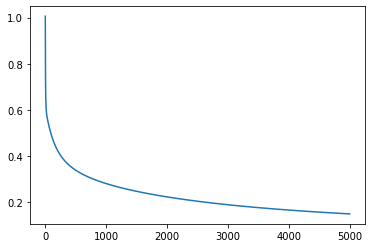

tensor([0.0421, 0.6558, 0.3021], grad_fn=<SelectBackward>)
tensor([0., 1., 0.])
0.14892920851707458


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

all_losses = np.array(all_losses, dtype = np.float)

plt.plot(all_losses)
plt.show()

print(pred[3])
print(labels_train_v[3])
print(all_losses[-1])

Looks like our model has converged towards zero in a very nice way! As you can see we have
printed the 3rd element of the training set and looks like it can predict what class flower it is in
that particular example. Now we validate our model to see how well it works on ’unseen’ data.
### 1.0.7 Validating the data of our test set.
Using sklearn’s inbuilt metrics to evaluate how good our model; because we are lazy to code our
own evaluation metric.

In [8]:
from sklearn.metrics import accuracy_score

predicted_values = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))

In [9]:
score = 0
for num in range(len(predicted_values)):
    if np.argmax(labels_test[num]) == np.argmax(predicted_values[num].data.numpy()):
        score = score + 1
        
accuracy = float(score / len(predicted_values)) * 100
print ('Testing Accuracy Score is ' + str(accuracy))

Testing Accuracy Score is 100.0


Looks like we got a pretty good linear classifier which can determine what flower it is depending on 4 features. Typically we do not expect such a high test accuracy value of 100% as real-life
situations have a lot more variation.